# Exploratory Data Analysis


In [24]:
#import packages and data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
sns.set()

df = pd.read_csv('data/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### Check for missing values and duplicates


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [26]:
df.duplicated().sum()

0

### Check descriptive characteristiscs and correlations

In [27]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<AxesSubplot: >

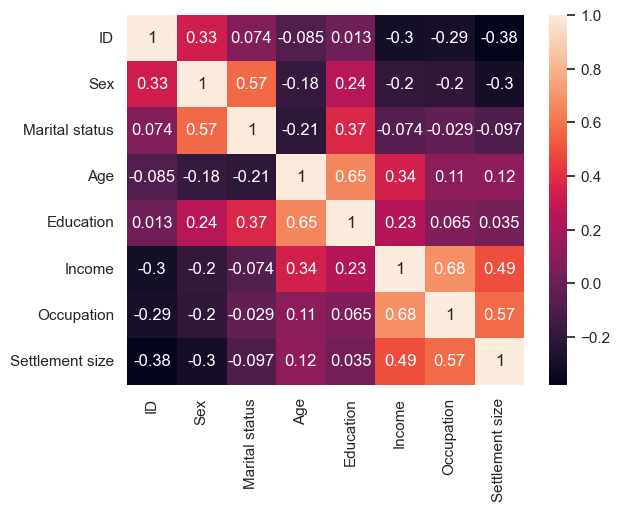

In [28]:
sns.heatmap(df.corr(), annot=True)

### Age seems to be positively correlated to Education, plot these to examine the relationship further

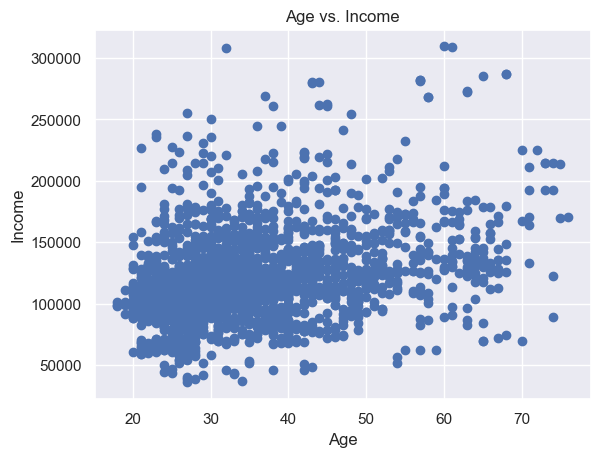

In [29]:
plt.scatter(df['Age'], df['Income'])
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

we need to standardize the data, because an age difference of 10 for instance is not the same as a income difference of 10

In [30]:
scaler = StandardScaler()
standardization = scaler.fit_transform(df)

### Hierarchical clustering


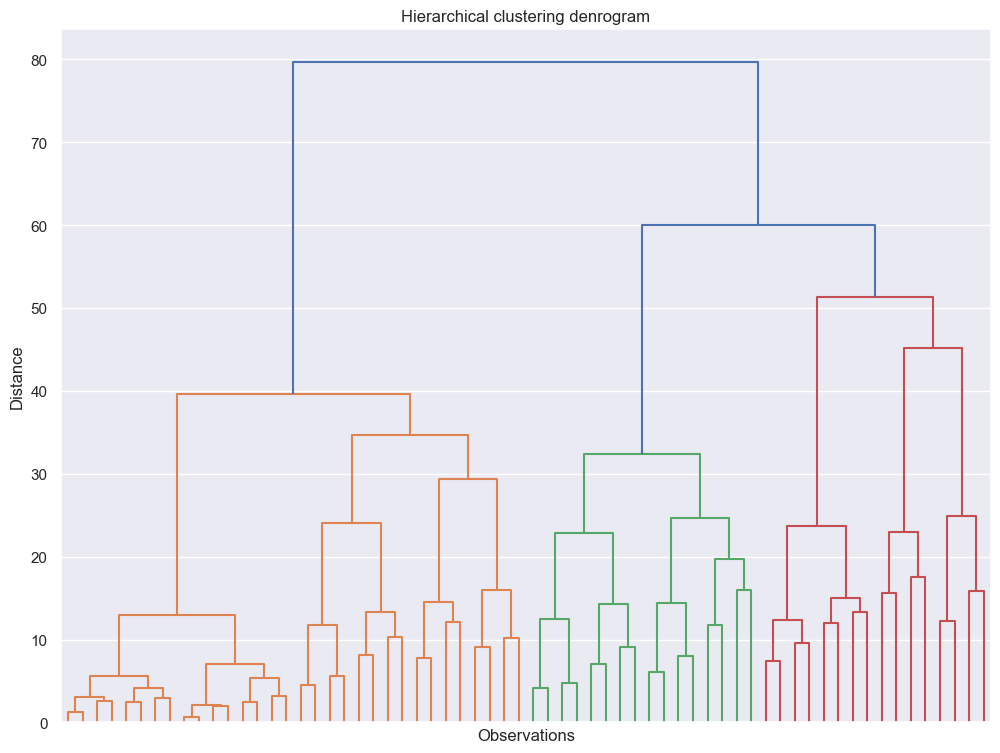

In [33]:
clustering = linkage(standardization, method = 'ward')

plt.figure(figsize = (12,9))
plt.title('Hierarchical clustering denrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram( clustering,
            truncate_mode = 'level',
            p=5,
            show_leaf_counts = False,
            no_labels = True
)
plt.show()


rule of tumb: find the longest vertical line unintercepted by a horizontal line from the dendogram, this is where we should make the cut